<a href="https://colab.research.google.com/github/Khawaritzmi/Deep-Learning/blob/master/CNN%20Lenet%20Architecture%20M-NIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded1 = files.upload()


Saving test.csv to test.csv


In [0]:
uploaded2 = files.upload()

Saving train.csv to train.csv


In [0]:
import tensorflow as tf 
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_test.head()




,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_train = pd.get_dummies(df_train,columns=["label"])
df_features = df_train.iloc[:, :-10].values
df_label = df_train.iloc[:, -10:].values
print(df_features.shape)

(42000, 784)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, 
                                                test_size = 0.2,
                                                random_state = 1212)

X_test,X_validation,y_test,y_validation = train_test_split(X_test,
                                                           y_test,
                                                           test_size=0.5,
                                                           random_state=0)
print(df_label.shape)

(42000, 10)


In [0]:
image_size = 28
num_labels = 10
num_channels = 1 # grayscale

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels

train_dataset, train_labels = reformat(X_train, y_train)
valid_dataset, valid_labels = reformat(X_validation, y_validation)
test_dataset , test_labels  = reformat(X_test, y_test)
df_test = df_test.as_matrix().reshape((-1, image_size, image_size, num_channels)).astype(np.float32)

print ('Training set   :', train_dataset.shape, train_labels.shape)
print ('Validation set :', valid_dataset.shape, valid_labels.shape)
print ('Test set       :', test_dataset.shape, test_labels.shape)
print ('Submission Test set       :', df_test.shape, test_labels.shape)

Training set   : (33600, 28, 28, 1) (33600, 1, 10)
Validation set : (4200, 28, 28, 1) (4200, 1, 10)
Test set       : (4200, 28, 28, 1) (4200, 1, 10)
Submission Test set       : (28000, 28, 28, 1) (4200, 1, 10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [0]:
X_train      = np.pad(train_dataset, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(valid_dataset, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(test_dataset, ((0,0),(2,2),(2,2),(0,0)), 'constant')
submission_test = np.pad(df_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')     
print ('Training set after padding 2x2    :', X_train.shape, train_labels.shape)
print ('Validation set after padding 2x2  :', X_validation.shape, valid_labels.shape)
print ('Test set after padding 2x2        :', X_test.shape, test_labels.shape)
print ('Submission data after padding 2x2 :', submission_test.shape)

Training set after padding 2x2    : (33600, 32, 32, 1) (33600, 1, 10)
Validation set after padding 2x2  : (4200, 32, 32, 1) (4200, 1, 10)
Test set after padding 2x2        : (4200, 32, 32, 1) (4200, 1, 10)
Submission data after padding 2x2 : (28000, 32, 32, 1)


In [0]:
def LeNet_5(x):
   
  # Layer 1 : Convolutional Layer. Input = 32x32x1, Output = 28x28x1.
  conv1_w = tf.Variable(tf.truncated_normal(shape = [5,5,1,6],mean = 0, stddev = 0.1))
  conv1_b = tf.Variable(tf.zeros(6))
  conv1 = tf.nn.conv2d(x,conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b 
  # TODO: Activation.
  conv1 = tf.nn.relu(conv1)
  
  # Pooling Layer. Input = 28x28x1. Output = 14x14x6.
  pool_1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
  
  
  # TODO: Layer 2: Convolutional. Output = 10x10x16.
  conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,16], mean = 0, stddev = 0.1))
  conv2_b = tf.Variable(tf.zeros(16))
  conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
  # TODO: Activation.
  conv2 = tf.nn.relu(conv2)

  # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
  pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
  
  # TODO: Flatten. Input = 5x5x16. Output = 400.
  fc1 = flatten(pool_2)
    
  
  # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
  fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120), mean = 0, stddev = 0.1))
  fc1_b = tf.Variable(tf.zeros(120))
  fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    
  # TODO: Activation.
  fc1 = tf.nn.relu(fc1)
    
  # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
  fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84), mean = 0, stddev = 0.1))
  fc2_b = tf.Variable(tf.zeros(84))
  fc2 = tf.matmul(fc1,fc2_w) + fc2_b
  # TODO: Activation.
  fc2 = tf.nn.relu(fc2)
    
  # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
  fc3_w = tf.Variable(tf.truncated_normal(shape = (84,10), mean = 0 , stddev = 0.1))
  fc3_b = tf.Variable(tf.zeros(10))
  logits = tf.matmul(fc2, fc3_w) + fc3_b
  return logits

In [0]:
x = tf.placeholder(tf.float32, shape=[None,32,32,1])
y_ = tf.placeholder(tf.int32, (None))

In [0]:
#Invoke LeNet function by passing features
logits = LeNet_5(x)

#Softmax with cost function implementation
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_, logits = logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [0]:
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(y_,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y_: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [0]:
#To initialise session and run

EPOCHS = 50
BATCH_SIZE = 128
Epochlist = []
Acclist = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training... with dataset - ", num_examples)
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y_: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        Epochlist.append(i+1)
        Acclist.append(validation_accuracy)
    
    saver = tf.train.Saver()
    save_path = saver.save(sess, '/tmp/lenet.ckpt')
    print("Model saved %s "%save_path)
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training... with dataset -  33600

EPOCH 1 ...
Validation Accuracy = 0.919

EPOCH 2 ...
Validation Accuracy = 0.950

EPOCH 3 ...
Validation Accuracy = 0.966

EPOCH 4 ...
Validation Accuracy = 0.964

EPOCH 5 ...
Validation Accuracy = 0.971

EPOCH 6 ...
Validation Accuracy = 0.974

EPOCH 7 ...
Validation Accuracy = 0.977

EPOCH 8 ...
Validation Accuracy = 0.979

EPOCH 9 ...
Validation Accuracy = 0.978

EPOCH 10 ...
Validation Accuracy = 0.980

EPOCH 11 ...
Validation Accuracy = 0.975

EPOCH 12 ...
Validation Accuracy = 0.978

EPOCH 13 ...
Validation Accuracy = 0.983

EPOCH 14 ...
Validation Accuracy = 0.974

EPOCH 15 ...
Validation Accuracy = 0.974

EPOCH 16 ...
Validation Accuracy = 0.980

EPOCH 17 ...
Validation Accuracy = 0.981

EPOCH 18 ...
Validation Accuracy = 0.983

EPOCH 19 ...
Validation Accuracy = 0.974

EPOCH 20 ...
Validation Accuracy = 0.978

EPOCH 21 ...
Validation Accuracy = 0.981

EPOCH 22 ...
Validation Accuracy = 0.982

EPOCH 23 ...
Validation Accuracy = 0.983

EPOCH 24

<function matplotlib.pyplot.show>

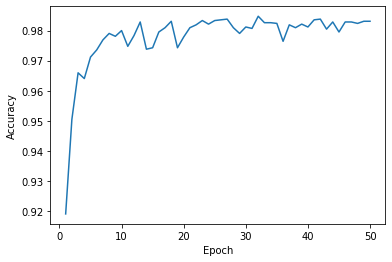

In [0]:
#plotting
import matplotlib.pyplot as plt
plt.plot(Epochlist,Acclist)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show

In [0]:
#To initialise session and run

EPOCHS = 100
BATCH_SIZE = 128
Epochlist = []
Acclist = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training... with dataset - ", num_examples)
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y_: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        Epochlist.append(i+1)
        Acclist.append(validation_accuracy)

    
    saver = tf.train.Saver()
    save_path = saver.save(sess, '/tmp/lenet.ckpt')
    print("Model saved %s "%save_path)
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))



Training... with dataset -  33600

EPOCH 1 ...
Validation Accuracy = 0.930

EPOCH 2 ...
Validation Accuracy = 0.959

EPOCH 3 ...
Validation Accuracy = 0.967

EPOCH 4 ...
Validation Accuracy = 0.973

EPOCH 5 ...
Validation Accuracy = 0.975

EPOCH 6 ...
Validation Accuracy = 0.977

EPOCH 7 ...
Validation Accuracy = 0.976

EPOCH 8 ...
Validation Accuracy = 0.978

EPOCH 9 ...
Validation Accuracy = 0.978

EPOCH 10 ...
Validation Accuracy = 0.981

EPOCH 11 ...
Validation Accuracy = 0.982

EPOCH 12 ...
Validation Accuracy = 0.975

EPOCH 13 ...
Validation Accuracy = 0.983

EPOCH 14 ...
Validation Accuracy = 0.980

EPOCH 15 ...
Validation Accuracy = 0.981

EPOCH 16 ...
Validation Accuracy = 0.980

EPOCH 17 ...
Validation Accuracy = 0.985

EPOCH 18 ...
Validation Accuracy = 0.973

EPOCH 19 ...
Validation Accuracy = 0.980

EPOCH 20 ...
Validation Accuracy = 0.986

EPOCH 21 ...
Validation Accuracy = 0.986

EPOCH 22 ...
Validation Accuracy = 0.981

EPOCH 23 ...
Validation Accuracy = 0.983

EPOCH 24

<function matplotlib.pyplot.show>

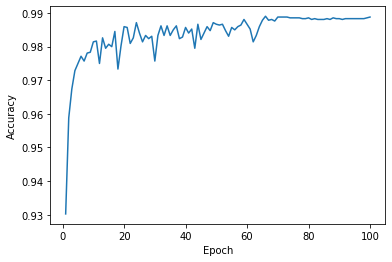

In [0]:
#plotting
import matplotlib.pyplot as plt
plt.plot(Epochlist,Acclist)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show